In [1]:
import keras as ks
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.constraints import maxnorm
from keras.layers import Dropout
from keras.optimizers import Adamax,Adam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

  



Using TensorFlow backend.


In [2]:
%ls

data_read.py  history.npy  k.txt         nkbins   params         Untitled.ipynb
dT_b          index        neutral_frac  norm_pk  powerspectrum


In [3]:
pk = np.loadtxt('norm_pk')
params = np.loadtxt('params')
ind = np.loadtxt('index')
index = np.zeros(len(ind),dtype = int)
for i in range(len(ind)):
    index[i] = ind[i]

    

In [4]:
pk_test = pk[index]
pk_train = np.delete(pk,index,axis=0)

params_test = params[index]
params_train = np.delete(params,index,axis=0)

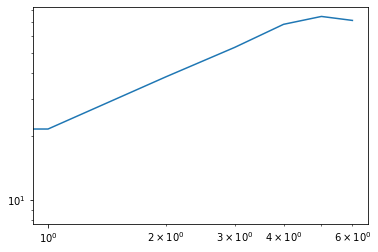

In [5]:
plt.loglog(pk_test[2])

In [6]:
'''Splitting the data_Powerspectrum for the training and testing ANN'''


'''securing the indices of the test data_Powerspectrum for MCMC analysis'''


'''=============================== ANN Structure=======================================

*   The ANN contains input layer + 6 hidden layers + output layer
*   The number of neurons in input and output layer are 3 & 7 respectively,
 these are corresponding to our 3 EoR parameters and  7 Powerspectrum values.
* The hidden layers have 3,300,600,300,150,70 neurons respectively.
* Exponential Linear Unit (elu) has been used as activation funtion.
'''
init_mode='uniform'
class myCallback(ks.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.99):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()


model = Sequential()
model.add(Dense(3, input_shape=[3,], activation='elu',kernel_initializer=init_mode,))
model.add(Dense(48,activation='elu',kernel_initializer=init_mode))
model.add(Dense(28,activation='elu',kernel_initializer=init_mode))
model.add(Dense(14,activation='elu',kernel_initializer=init_mode))

'''model.add(Dense(150,activation='elu',kernel_initializer=init_mode))
model.add(Dense(70,activation='elu',kernel_initializer=init_mode))
'''
    #model.add(Dropout(dropout_rate))
model.add(Dense(7, activation='linear'))
'''
* Mean Square Error (mse) as the loss function.
* ADAM as optimizer.
'''
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])



#model.save('EMuPk22.h5')                         # Saving the ANN model.






In [7]:
history=model.fit(params_train, pk_train,validation_split=0.038, epochs=5000, batch_size=10,callbacks=[callbacks])


Train on 1000 samples, validate on 40 samples
Epoch 1/5000
1000/1000 [==============================] - 1s 533us/step - loss: 1683.8625 - accuracy: 0.7880 - val_loss: 285.2613 - val_accuracy: 0.7250
Epoch 2/5000
1000/1000 [==============================] - 0s 306us/step - loss: 296.7551 - accuracy: 0.7970 - val_loss: 219.2016 - val_accuracy: 0.7250
Epoch 3/5000
1000/1000 [==============================] - 0s 331us/step - loss: 232.1770 - accuracy: 0.7970 - val_loss: 239.7914 - val_accuracy: 0.7250
Epoch 4/5000
1000/1000 [==============================] - 0s 258us/step - loss: 206.6935 - accuracy: 0.7970 - val_loss: 212.7162 - val_accuracy: 0.7250
Epoch 5/5000
1000/1000 [==============================] - 0s 304us/step - loss: 189.4080 - accuracy: 0.7970 - val_loss: 220.7888 - val_accuracy: 0.7250
Epoch 6/5000
1000/1000 [==============================] - 0s 206us/step - loss: 178.0763 - accuracy: 0.7970 - val_loss: 208.3450 - val_accuracy: 0.7250
Epoch 7/5000
1000/1000 [=================

Epoch 55/5000
1000/1000 [==============================] - 0s 212us/step - loss: 16.6094 - accuracy: 0.8390 - val_loss: 12.3001 - val_accuracy: 0.7750
Epoch 56/5000
1000/1000 [==============================] - 0s 204us/step - loss: 15.1483 - accuracy: 0.8370 - val_loss: 9.8298 - val_accuracy: 0.8000
Epoch 57/5000
1000/1000 [==============================] - 0s 209us/step - loss: 13.9618 - accuracy: 0.8360 - val_loss: 11.3648 - val_accuracy: 0.8250
Epoch 58/5000
1000/1000 [==============================] - 0s 320us/step - loss: 13.2598 - accuracy: 0.8410 - val_loss: 11.6752 - val_accuracy: 0.7500
Epoch 59/5000
1000/1000 [==============================] - 0s 189us/step - loss: 12.7490 - accuracy: 0.8390 - val_loss: 13.1258 - val_accuracy: 0.8250
Epoch 60/5000
1000/1000 [==============================] - 0s 186us/step - loss: 12.0981 - accuracy: 0.8360 - val_loss: 10.5486 - val_accuracy: 0.8500
Epoch 61/5000
1000/1000 [==============================] - 0s 194us/step - loss: 12.1663 - accu

Epoch 110/5000
1000/1000 [==============================] - 0s 179us/step - loss: 4.3412 - accuracy: 0.8970 - val_loss: 4.4785 - val_accuracy: 0.8250
Epoch 111/5000
1000/1000 [==============================] - 0s 177us/step - loss: 4.1570 - accuracy: 0.9030 - val_loss: 3.8098 - val_accuracy: 0.8250
Epoch 112/5000
1000/1000 [==============================] - 0s 182us/step - loss: 4.2138 - accuracy: 0.9020 - val_loss: 3.7438 - val_accuracy: 0.8500
Epoch 113/5000
1000/1000 [==============================] - 0s 183us/step - loss: 4.2577 - accuracy: 0.9020 - val_loss: 5.1809 - val_accuracy: 0.8500
Epoch 114/5000
1000/1000 [==============================] - 0s 187us/step - loss: 4.5810 - accuracy: 0.9030 - val_loss: 4.2216 - val_accuracy: 0.8250
Epoch 115/5000
1000/1000 [==============================] - 0s 188us/step - loss: 4.2211 - accuracy: 0.9040 - val_loss: 3.4977 - val_accuracy: 0.8250
Epoch 116/5000
1000/1000 [==============================] - 0s 187us/step - loss: 4.1072 - accuracy:

1000/1000 [==============================] - 0s 372us/step - loss: 3.0208 - accuracy: 0.9120 - val_loss: 3.6195 - val_accuracy: 0.8750
Epoch 165/5000
1000/1000 [==============================] - 0s 285us/step - loss: 2.9264 - accuracy: 0.9050 - val_loss: 3.0024 - val_accuracy: 0.8750
Epoch 166/5000
1000/1000 [==============================] - 0s 176us/step - loss: 2.9482 - accuracy: 0.9090 - val_loss: 2.8187 - val_accuracy: 0.8500
Epoch 167/5000
1000/1000 [==============================] - 0s 174us/step - loss: 2.6392 - accuracy: 0.9070 - val_loss: 2.8838 - val_accuracy: 0.8750
Epoch 168/5000
1000/1000 [==============================] - 0s 175us/step - loss: 2.7500 - accuracy: 0.9110 - val_loss: 2.9141 - val_accuracy: 0.8500
Epoch 169/5000
1000/1000 [==============================] - 0s 180us/step - loss: 2.8560 - accuracy: 0.9030 - val_loss: 6.1495 - val_accuracy: 0.8500
Epoch 170/5000
1000/1000 [==============================] - 0s 181us/step - loss: 3.8592 - accuracy: 0.9080 - val_l

Epoch 219/5000
1000/1000 [==============================] - 0s 328us/step - loss: 2.8358 - accuracy: 0.9110 - val_loss: 4.1349 - val_accuracy: 0.8500
Epoch 220/5000
1000/1000 [==============================] - 0s 350us/step - loss: 2.8661 - accuracy: 0.9100 - val_loss: 3.7954 - val_accuracy: 0.8500
Epoch 221/5000
1000/1000 [==============================] - 0s 199us/step - loss: 2.1750 - accuracy: 0.9090 - val_loss: 2.3998 - val_accuracy: 0.8500
Epoch 222/5000
1000/1000 [==============================] - 0s 180us/step - loss: 2.2084 - accuracy: 0.9070 - val_loss: 2.5184 - val_accuracy: 0.8500
Epoch 223/5000
1000/1000 [==============================] - 0s 211us/step - loss: 2.2609 - accuracy: 0.9060 - val_loss: 2.6433 - val_accuracy: 0.8750
Epoch 224/5000
1000/1000 [==============================] - 0s 181us/step - loss: 2.1788 - accuracy: 0.9160 - val_loss: 2.5717 - val_accuracy: 0.8500
Epoch 225/5000
1000/1000 [==============================] - 0s 301us/step - loss: 2.2486 - accuracy:

1000/1000 [==============================] - 0s 427us/step - loss: 1.4929 - accuracy: 0.9210 - val_loss: 2.3564 - val_accuracy: 0.9000
Epoch 274/5000
1000/1000 [==============================] - 0s 437us/step - loss: 3.1323 - accuracy: 0.9170 - val_loss: 2.0327 - val_accuracy: 0.8750
Epoch 275/5000
1000/1000 [==============================] - 0s 432us/step - loss: 1.8270 - accuracy: 0.9160 - val_loss: 2.1655 - val_accuracy: 0.8750
Epoch 276/5000
1000/1000 [==============================] - 0s 454us/step - loss: 1.6943 - accuracy: 0.9150 - val_loss: 2.0238 - val_accuracy: 0.8750
Epoch 277/5000
1000/1000 [==============================] - 0s 431us/step - loss: 1.6218 - accuracy: 0.9200 - val_loss: 1.8807 - val_accuracy: 0.8750
Epoch 278/5000
1000/1000 [==============================] - 0s 403us/step - loss: 1.4357 - accuracy: 0.9170 - val_loss: 1.8186 - val_accuracy: 0.8750
Epoch 279/5000
1000/1000 [==============================] - 0s 350us/step - loss: 1.6690 - accuracy: 0.9210 - val_l

Epoch 328/5000
1000/1000 [==============================] - 0s 329us/step - loss: 1.3116 - accuracy: 0.9330 - val_loss: 3.7596 - val_accuracy: 0.8750
Epoch 329/5000
1000/1000 [==============================] - 0s 196us/step - loss: 1.4740 - accuracy: 0.9310 - val_loss: 2.3530 - val_accuracy: 0.8750
Epoch 330/5000
1000/1000 [==============================] - 0s 179us/step - loss: 1.2221 - accuracy: 0.9310 - val_loss: 1.4734 - val_accuracy: 0.8750
Epoch 331/5000
1000/1000 [==============================] - 0s 179us/step - loss: 1.3326 - accuracy: 0.9350 - val_loss: 1.7394 - val_accuracy: 0.9000
Epoch 332/5000
1000/1000 [==============================] - 0s 178us/step - loss: 1.1788 - accuracy: 0.9370 - val_loss: 1.9147 - val_accuracy: 0.8750
Epoch 333/5000
1000/1000 [==============================] - 0s 182us/step - loss: 1.4128 - accuracy: 0.9340 - val_loss: 1.9525 - val_accuracy: 0.8750
Epoch 334/5000
1000/1000 [==============================] - 0s 280us/step - loss: 1.3805 - accuracy:

1000/1000 [==============================] - 0s 339us/step - loss: 1.2566 - accuracy: 0.9470 - val_loss: 1.3076 - val_accuracy: 0.9000
Epoch 383/5000
1000/1000 [==============================] - 0s 321us/step - loss: 1.0789 - accuracy: 0.9410 - val_loss: 1.2465 - val_accuracy: 0.8750
Epoch 384/5000
1000/1000 [==============================] - 0s 318us/step - loss: 0.9194 - accuracy: 0.9330 - val_loss: 1.3497 - val_accuracy: 0.9000
Epoch 385/5000
1000/1000 [==============================] - 0s 324us/step - loss: 0.9596 - accuracy: 0.9450 - val_loss: 1.3756 - val_accuracy: 0.8750
Epoch 386/5000
1000/1000 [==============================] - 0s 327us/step - loss: 0.9204 - accuracy: 0.9390 - val_loss: 1.4452 - val_accuracy: 0.8750
Epoch 387/5000
1000/1000 [==============================] - 0s 304us/step - loss: 1.1706 - accuracy: 0.9380 - val_loss: 1.3380 - val_accuracy: 0.8750
Epoch 388/5000
1000/1000 [==============================] - 0s 173us/step - loss: 0.8937 - accuracy: 0.9410 - val_l

Epoch 437/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.8125 - accuracy: 0.9410 - val_loss: 0.9321 - val_accuracy: 0.8750
Epoch 438/5000
1000/1000 [==============================] - 0s 346us/step - loss: 0.8982 - accuracy: 0.9400 - val_loss: 0.9590 - val_accuracy: 0.9000
Epoch 439/5000
1000/1000 [==============================] - 0s 341us/step - loss: 0.7115 - accuracy: 0.9410 - val_loss: 0.8800 - val_accuracy: 0.8750
Epoch 440/5000
1000/1000 [==============================] - 0s 397us/step - loss: 1.0275 - accuracy: 0.9440 - val_loss: 4.1279 - val_accuracy: 0.9000
Epoch 441/5000
1000/1000 [==============================] - 0s 324us/step - loss: 0.8860 - accuracy: 0.9430 - val_loss: 0.9106 - val_accuracy: 0.8750
Epoch 442/5000
1000/1000 [==============================] - 0s 339us/step - loss: 0.8092 - accuracy: 0.9420 - val_loss: 1.2030 - val_accuracy: 0.9000
Epoch 443/5000
1000/1000 [==============================] - 0s 336us/step - loss: 1.0357 - accuracy:

1000/1000 [==============================] - 0s 181us/step - loss: 0.7439 - accuracy: 0.9510 - val_loss: 0.5787 - val_accuracy: 0.8750
Epoch 492/5000
1000/1000 [==============================] - 0s 183us/step - loss: 0.5544 - accuracy: 0.9500 - val_loss: 0.5964 - val_accuracy: 0.8750
Epoch 493/5000
1000/1000 [==============================] - 0s 182us/step - loss: 0.7063 - accuracy: 0.9570 - val_loss: 0.8768 - val_accuracy: 0.9000
Epoch 494/5000
1000/1000 [==============================] - 0s 181us/step - loss: 0.5871 - accuracy: 0.9510 - val_loss: 0.7394 - val_accuracy: 0.8750
Epoch 495/5000
1000/1000 [==============================] - 0s 181us/step - loss: 1.4619 - accuracy: 0.9510 - val_loss: 1.9258 - val_accuracy: 0.8750
Epoch 496/5000
1000/1000 [==============================] - 0s 290us/step - loss: 1.0386 - accuracy: 0.9500 - val_loss: 1.7828 - val_accuracy: 0.8750
Epoch 497/5000
1000/1000 [==============================] - 0s 321us/step - loss: 0.6930 - accuracy: 0.9530 - val_l

Epoch 546/5000
1000/1000 [==============================] - 0s 178us/step - loss: 0.4987 - accuracy: 0.9630 - val_loss: 0.6112 - val_accuracy: 0.9000
Epoch 547/5000
1000/1000 [==============================] - 0s 173us/step - loss: 0.4526 - accuracy: 0.9640 - val_loss: 0.4047 - val_accuracy: 0.8750
Epoch 548/5000
1000/1000 [==============================] - 0s 215us/step - loss: 0.4467 - accuracy: 0.9630 - val_loss: 0.5284 - val_accuracy: 0.8750
Epoch 549/5000
1000/1000 [==============================] - 0s 267us/step - loss: 0.4915 - accuracy: 0.9590 - val_loss: 0.4433 - val_accuracy: 0.9000
Epoch 550/5000
1000/1000 [==============================] - 0s 182us/step - loss: 1.4183 - accuracy: 0.9550 - val_loss: 0.9409 - val_accuracy: 0.9000
Epoch 551/5000
1000/1000 [==============================] - 0s 188us/step - loss: 0.7227 - accuracy: 0.9640 - val_loss: 0.4867 - val_accuracy: 0.9000
Epoch 552/5000
1000/1000 [==============================] - 0s 261us/step - loss: 0.4345 - accuracy:

1000/1000 [==============================] - 0s 319us/step - loss: 0.6166 - accuracy: 0.9610 - val_loss: 1.8197 - val_accuracy: 0.9000
Epoch 601/5000
1000/1000 [==============================] - 0s 316us/step - loss: 0.6517 - accuracy: 0.9670 - val_loss: 0.4973 - val_accuracy: 0.9000
Epoch 602/5000
1000/1000 [==============================] - 0s 337us/step - loss: 0.4866 - accuracy: 0.9690 - val_loss: 0.4902 - val_accuracy: 0.9000
Epoch 603/5000
1000/1000 [==============================] - 0s 198us/step - loss: 0.4263 - accuracy: 0.9620 - val_loss: 0.4599 - val_accuracy: 0.9000
Epoch 604/5000
1000/1000 [==============================] - 0s 176us/step - loss: 0.5746 - accuracy: 0.9630 - val_loss: 0.4870 - val_accuracy: 0.9000
Epoch 605/5000
1000/1000 [==============================] - 0s 175us/step - loss: 0.4818 - accuracy: 0.9700 - val_loss: 0.7691 - val_accuracy: 0.9000
Epoch 606/5000
1000/1000 [==============================] - 0s 173us/step - loss: 0.4412 - accuracy: 0.9690 - val_l

Epoch 655/5000
1000/1000 [==============================] - 0s 387us/step - loss: 0.3827 - accuracy: 0.9710 - val_loss: 0.3244 - val_accuracy: 0.9000
Epoch 656/5000
1000/1000 [==============================] - 0s 387us/step - loss: 0.4484 - accuracy: 0.9670 - val_loss: 0.3183 - val_accuracy: 0.9000
Epoch 657/5000
1000/1000 [==============================] - 0s 388us/step - loss: 0.4278 - accuracy: 0.9720 - val_loss: 0.3283 - val_accuracy: 0.9000
Epoch 658/5000
1000/1000 [==============================] - 0s 344us/step - loss: 0.3571 - accuracy: 0.9740 - val_loss: 0.3872 - val_accuracy: 0.9000
Epoch 659/5000
1000/1000 [==============================] - 0s 333us/step - loss: 0.4021 - accuracy: 0.9690 - val_loss: 0.5205 - val_accuracy: 0.9000
Epoch 660/5000
1000/1000 [==============================] - 0s 331us/step - loss: 0.5525 - accuracy: 0.9690 - val_loss: 0.3226 - val_accuracy: 0.9000
Epoch 661/5000
1000/1000 [==============================] - 0s 324us/step - loss: 0.3759 - accuracy:

1000/1000 [==============================] - 0s 202us/step - loss: 0.9047 - accuracy: 0.9660 - val_loss: 0.5570 - val_accuracy: 0.9250
Epoch 710/5000
1000/1000 [==============================] - 0s 203us/step - loss: 0.6048 - accuracy: 0.9740 - val_loss: 0.7509 - val_accuracy: 0.9000
Epoch 711/5000
1000/1000 [==============================] - 0s 201us/step - loss: 0.7143 - accuracy: 0.9710 - val_loss: 0.5535 - val_accuracy: 0.9000
Epoch 712/5000
1000/1000 [==============================] - 0s 199us/step - loss: 0.3405 - accuracy: 0.9710 - val_loss: 0.4975 - val_accuracy: 0.9000
Epoch 713/5000
1000/1000 [==============================] - 0s 192us/step - loss: 0.3498 - accuracy: 0.9710 - val_loss: 0.2591 - val_accuracy: 0.9000
Epoch 714/5000
1000/1000 [==============================] - 0s 221us/step - loss: 0.3388 - accuracy: 0.9700 - val_loss: 0.3791 - val_accuracy: 0.9000
Epoch 715/5000
1000/1000 [==============================] - 0s 229us/step - loss: 0.3893 - accuracy: 0.9730 - val_l

Epoch 764/5000
1000/1000 [==============================] - 0s 182us/step - loss: 0.3101 - accuracy: 0.9710 - val_loss: 0.2693 - val_accuracy: 0.9000
Epoch 765/5000
1000/1000 [==============================] - 0s 181us/step - loss: 0.4371 - accuracy: 0.9770 - val_loss: 0.4902 - val_accuracy: 0.9000
Epoch 766/5000
1000/1000 [==============================] - 0s 184us/step - loss: 0.3990 - accuracy: 0.9720 - val_loss: 0.4468 - val_accuracy: 0.9000
Epoch 767/5000
1000/1000 [==============================] - 0s 177us/step - loss: 0.3555 - accuracy: 0.9740 - val_loss: 0.4626 - val_accuracy: 0.9500
Epoch 768/5000
1000/1000 [==============================] - 0s 179us/step - loss: 0.4208 - accuracy: 0.9740 - val_loss: 0.3704 - val_accuracy: 0.9000
Epoch 769/5000
1000/1000 [==============================] - 0s 267us/step - loss: 0.4473 - accuracy: 0.9750 - val_loss: 0.8968 - val_accuracy: 0.9000
Epoch 770/5000
1000/1000 [==============================] - 0s 187us/step - loss: 0.8465 - accuracy:

1000/1000 [==============================] - 0s 279us/step - loss: 0.3194 - accuracy: 0.9730 - val_loss: 0.3362 - val_accuracy: 0.9000
Epoch 819/5000
1000/1000 [==============================] - 0s 174us/step - loss: 0.6762 - accuracy: 0.9690 - val_loss: 1.6249 - val_accuracy: 0.9000
Epoch 820/5000
1000/1000 [==============================] - 0s 171us/step - loss: 0.5507 - accuracy: 0.9730 - val_loss: 0.2480 - val_accuracy: 0.9250
Epoch 821/5000
1000/1000 [==============================] - 0s 175us/step - loss: 0.3076 - accuracy: 0.9760 - val_loss: 0.7708 - val_accuracy: 0.9500
Epoch 822/5000
1000/1000 [==============================] - 0s 172us/step - loss: 0.3525 - accuracy: 0.9720 - val_loss: 0.4975 - val_accuracy: 0.9500
Epoch 823/5000
1000/1000 [==============================] - 0s 181us/step - loss: 0.4270 - accuracy: 0.9710 - val_loss: 0.2236 - val_accuracy: 0.9000
Epoch 824/5000
1000/1000 [==============================] - 0s 179us/step - loss: 0.3343 - accuracy: 0.9750 - val_l

Epoch 873/5000
1000/1000 [==============================] - 0s 339us/step - loss: 0.9054 - accuracy: 0.9720 - val_loss: 0.8242 - val_accuracy: 0.9500
Epoch 874/5000
1000/1000 [==============================] - 0s 343us/step - loss: 0.4652 - accuracy: 0.9770 - val_loss: 0.4846 - val_accuracy: 0.9500
Epoch 875/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.2333 - accuracy: 0.9750 - val_loss: 0.2879 - val_accuracy: 0.9250
Epoch 876/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.2528 - accuracy: 0.9720 - val_loss: 0.3143 - val_accuracy: 0.9500
Epoch 877/5000
1000/1000 [==============================] - 0s 313us/step - loss: 0.3407 - accuracy: 0.9740 - val_loss: 0.4043 - val_accuracy: 0.9500
Epoch 878/5000
1000/1000 [==============================] - 0s 327us/step - loss: 0.2684 - accuracy: 0.9780 - val_loss: 0.5432 - val_accuracy: 0.9000
Epoch 879/5000
1000/1000 [==============================] - 0s 313us/step - loss: 1.1014 - accuracy:

1000/1000 [==============================] - 0s 410us/step - loss: 0.3194 - accuracy: 0.9760 - val_loss: 0.5723 - val_accuracy: 0.9500
Epoch 928/5000
1000/1000 [==============================] - 0s 415us/step - loss: 0.2418 - accuracy: 0.9810 - val_loss: 0.2000 - val_accuracy: 0.9000
Epoch 929/5000
1000/1000 [==============================] - 0s 376us/step - loss: 0.2943 - accuracy: 0.9740 - val_loss: 0.2229 - val_accuracy: 0.9500
Epoch 930/5000
1000/1000 [==============================] - 0s 345us/step - loss: 0.2954 - accuracy: 0.9780 - val_loss: 1.1618 - val_accuracy: 0.9000
Epoch 931/5000
1000/1000 [==============================] - 0s 402us/step - loss: 0.3612 - accuracy: 0.9750 - val_loss: 0.3263 - val_accuracy: 0.9250
Epoch 932/5000
1000/1000 [==============================] - 0s 347us/step - loss: 0.2690 - accuracy: 0.9800 - val_loss: 0.2182 - val_accuracy: 0.9500
Epoch 933/5000
1000/1000 [==============================] - 0s 335us/step - loss: 0.3219 - accuracy: 0.9770 - val_l

Epoch 982/5000
1000/1000 [==============================] - 0s 409us/step - loss: 0.5607 - accuracy: 0.9760 - val_loss: 0.2483 - val_accuracy: 0.9000
Epoch 983/5000
1000/1000 [==============================] - 0s 418us/step - loss: 0.2666 - accuracy: 0.9830 - val_loss: 0.2368 - val_accuracy: 0.9250
Epoch 984/5000
1000/1000 [==============================] - 0s 420us/step - loss: 0.1953 - accuracy: 0.9790 - val_loss: 0.1708 - val_accuracy: 0.9000
Epoch 985/5000
1000/1000 [==============================] - 0s 412us/step - loss: 0.2090 - accuracy: 0.9770 - val_loss: 0.2256 - val_accuracy: 0.9000
Epoch 986/5000
1000/1000 [==============================] - 0s 375us/step - loss: 0.4000 - accuracy: 0.9720 - val_loss: 0.3571 - val_accuracy: 0.9500
Epoch 987/5000
1000/1000 [==============================] - 0s 461us/step - loss: 0.2300 - accuracy: 0.9760 - val_loss: 0.2224 - val_accuracy: 0.9000
Epoch 988/5000
1000/1000 [==============================] - 0s 372us/step - loss: 0.3186 - accuracy:

1000/1000 [==============================] - 0s 196us/step - loss: 0.2290 - accuracy: 0.9770 - val_loss: 0.1888 - val_accuracy: 0.9250
Epoch 1037/5000
1000/1000 [==============================] - 0s 287us/step - loss: 0.1676 - accuracy: 0.9790 - val_loss: 0.2152 - val_accuracy: 0.9000
Epoch 1038/5000
1000/1000 [==============================] - 0s 327us/step - loss: 0.2073 - accuracy: 0.9780 - val_loss: 0.2796 - val_accuracy: 0.9000
Epoch 1039/5000
1000/1000 [==============================] - 0s 397us/step - loss: 0.3524 - accuracy: 0.9770 - val_loss: 0.2318 - val_accuracy: 0.9500
Epoch 1040/5000
1000/1000 [==============================] - 0s 411us/step - loss: 0.3228 - accuracy: 0.9780 - val_loss: 0.3151 - val_accuracy: 0.9500
Epoch 1041/5000
1000/1000 [==============================] - 0s 394us/step - loss: 0.3090 - accuracy: 0.9790 - val_loss: 0.2770 - val_accuracy: 0.9000
Epoch 1042/5000
1000/1000 [==============================] - 0s 429us/step - loss: 0.6410 - accuracy: 0.9750 -

1000/1000 [==============================] - 0s 183us/step - loss: 0.4184 - accuracy: 0.9790 - val_loss: 0.2658 - val_accuracy: 0.9000
Epoch 1091/5000
1000/1000 [==============================] - 0s 183us/step - loss: 0.2178 - accuracy: 0.9770 - val_loss: 0.1555 - val_accuracy: 0.9250
Epoch 1092/5000
1000/1000 [==============================] - 0s 214us/step - loss: 0.1739 - accuracy: 0.9820 - val_loss: 0.2186 - val_accuracy: 0.9000
Epoch 1093/5000
1000/1000 [==============================] - 0s 198us/step - loss: 0.9570 - accuracy: 0.9750 - val_loss: 1.0709 - val_accuracy: 0.9000
Epoch 1094/5000
1000/1000 [==============================] - 0s 189us/step - loss: 0.7145 - accuracy: 0.9780 - val_loss: 0.2901 - val_accuracy: 0.9000
Epoch 1095/5000
1000/1000 [==============================] - 0s 199us/step - loss: 0.2626 - accuracy: 0.9720 - val_loss: 0.1818 - val_accuracy: 0.9000
Epoch 1096/5000
1000/1000 [==============================] - 0s 265us/step - loss: 0.1566 - accuracy: 0.9800 -

1000/1000 [==============================] - 0s 194us/step - loss: 0.3129 - accuracy: 0.9790 - val_loss: 0.3276 - val_accuracy: 0.9750
Epoch 1145/5000
1000/1000 [==============================] - 0s 225us/step - loss: 0.2731 - accuracy: 0.9750 - val_loss: 0.3236 - val_accuracy: 0.9250
Epoch 1146/5000
1000/1000 [==============================] - 0s 216us/step - loss: 0.2067 - accuracy: 0.9800 - val_loss: 0.2202 - val_accuracy: 0.9500
Epoch 1147/5000
1000/1000 [==============================] - 0s 198us/step - loss: 0.2425 - accuracy: 0.9760 - val_loss: 0.2538 - val_accuracy: 0.9000
Epoch 1148/5000
1000/1000 [==============================] - 0s 226us/step - loss: 0.2234 - accuracy: 0.9790 - val_loss: 0.1946 - val_accuracy: 0.9250
Epoch 1149/5000
1000/1000 [==============================] - 0s 257us/step - loss: 0.1682 - accuracy: 0.9790 - val_loss: 0.1493 - val_accuracy: 0.9000
Epoch 1150/5000
1000/1000 [==============================] - 0s 217us/step - loss: 0.2359 - accuracy: 0.9790 -

1000/1000 [==============================] - 0s 210us/step - loss: 0.2658 - accuracy: 0.9820 - val_loss: 0.1514 - val_accuracy: 0.9000
Epoch 1199/5000
1000/1000 [==============================] - 0s 223us/step - loss: 0.2741 - accuracy: 0.9850 - val_loss: 0.2421 - val_accuracy: 0.9250
Epoch 1200/5000
1000/1000 [==============================] - 0s 237us/step - loss: 0.2752 - accuracy: 0.9730 - val_loss: 0.2826 - val_accuracy: 0.9250
Epoch 1201/5000
1000/1000 [==============================] - 0s 228us/step - loss: 0.2120 - accuracy: 0.9760 - val_loss: 0.1751 - val_accuracy: 0.9000
Epoch 1202/5000
1000/1000 [==============================] - 0s 208us/step - loss: 0.3855 - accuracy: 0.9780 - val_loss: 0.6866 - val_accuracy: 0.9250
Epoch 1203/5000
1000/1000 [==============================] - 0s 201us/step - loss: 0.3487 - accuracy: 0.9760 - val_loss: 0.1574 - val_accuracy: 0.9250
Epoch 1204/5000
1000/1000 [==============================] - 0s 312us/step - loss: 0.2610 - accuracy: 0.9780 -

1000/1000 [==============================] - 0s 211us/step - loss: 0.1428 - accuracy: 0.9790 - val_loss: 0.1033 - val_accuracy: 0.9250
Epoch 1253/5000
1000/1000 [==============================] - 0s 231us/step - loss: 0.1414 - accuracy: 0.9810 - val_loss: 0.1424 - val_accuracy: 0.9750
Epoch 1254/5000
1000/1000 [==============================] - 0s 234us/step - loss: 0.1477 - accuracy: 0.9770 - val_loss: 0.1068 - val_accuracy: 0.9500
Epoch 1255/5000
1000/1000 [==============================] - 0s 235us/step - loss: 0.1543 - accuracy: 0.9800 - val_loss: 0.1876 - val_accuracy: 0.9000
Epoch 1256/5000
1000/1000 [==============================] - 0s 222us/step - loss: 0.3974 - accuracy: 0.9780 - val_loss: 0.1380 - val_accuracy: 0.9000
Epoch 1257/5000
1000/1000 [==============================] - 0s 235us/step - loss: 0.2318 - accuracy: 0.9790 - val_loss: 0.3290 - val_accuracy: 0.9750
Epoch 1258/5000
1000/1000 [==============================] - 0s 243us/step - loss: 0.2369 - accuracy: 0.9830 -

1000/1000 [==============================] - 0s 209us/step - loss: 0.1845 - accuracy: 0.9830 - val_loss: 0.1262 - val_accuracy: 0.9250
Epoch 1307/5000
1000/1000 [==============================] - 0s 195us/step - loss: 0.2219 - accuracy: 0.9770 - val_loss: 0.1863 - val_accuracy: 0.9500
Epoch 1308/5000
1000/1000 [==============================] - 0s 200us/step - loss: 0.2077 - accuracy: 0.9790 - val_loss: 0.3913 - val_accuracy: 0.9250
Epoch 1309/5000
1000/1000 [==============================] - 0s 216us/step - loss: 0.1409 - accuracy: 0.9820 - val_loss: 0.1388 - val_accuracy: 0.9250
Epoch 1310/5000
1000/1000 [==============================] - 0s 220us/step - loss: 0.2362 - accuracy: 0.9810 - val_loss: 0.2674 - val_accuracy: 0.9250
Epoch 1311/5000
1000/1000 [==============================] - 0s 221us/step - loss: 0.8447 - accuracy: 0.9730 - val_loss: 1.6632 - val_accuracy: 0.9000
Epoch 1312/5000
1000/1000 [==============================] - 0s 230us/step - loss: 0.4525 - accuracy: 0.9760 -

1000/1000 [==============================] - 0s 225us/step - loss: 0.3310 - accuracy: 0.9780 - val_loss: 0.1767 - val_accuracy: 0.9500
Epoch 1361/5000
1000/1000 [==============================] - 0s 207us/step - loss: 0.2700 - accuracy: 0.9800 - val_loss: 0.2921 - val_accuracy: 0.9500
Epoch 1362/5000
1000/1000 [==============================] - 0s 222us/step - loss: 0.1820 - accuracy: 0.9770 - val_loss: 0.1481 - val_accuracy: 1.0000
Epoch 1363/5000
1000/1000 [==============================] - 0s 221us/step - loss: 0.1609 - accuracy: 0.9780 - val_loss: 0.1139 - val_accuracy: 0.9250
Epoch 1364/5000
1000/1000 [==============================] - 0s 209us/step - loss: 0.2554 - accuracy: 0.9830 - val_loss: 0.2726 - val_accuracy: 0.9000
Epoch 1365/5000
1000/1000 [==============================] - 0s 209us/step - loss: 0.3631 - accuracy: 0.9800 - val_loss: 0.1766 - val_accuracy: 0.9750
Epoch 1366/5000
1000/1000 [==============================] - 0s 210us/step - loss: 0.5075 - accuracy: 0.9810 -

1000/1000 [==============================] - 0s 201us/step - loss: 0.4897 - accuracy: 0.9790 - val_loss: 0.2233 - val_accuracy: 0.9750
Epoch 1415/5000
1000/1000 [==============================] - 0s 199us/step - loss: 0.3642 - accuracy: 0.9740 - val_loss: 0.2275 - val_accuracy: 0.9000
Epoch 1416/5000
1000/1000 [==============================] - 0s 214us/step - loss: 0.1318 - accuracy: 0.9800 - val_loss: 0.0684 - val_accuracy: 0.9000
Epoch 1417/5000
1000/1000 [==============================] - 0s 222us/step - loss: 0.1581 - accuracy: 0.9770 - val_loss: 0.0833 - val_accuracy: 0.9500
Epoch 1418/5000
1000/1000 [==============================] - 0s 208us/step - loss: 0.1130 - accuracy: 0.9810 - val_loss: 0.1035 - val_accuracy: 0.9000
Epoch 1419/5000
1000/1000 [==============================] - 0s 206us/step - loss: 0.1772 - accuracy: 0.9760 - val_loss: 0.1270 - val_accuracy: 0.9250
Epoch 1420/5000
1000/1000 [==============================] - 0s 206us/step - loss: 0.1648 - accuracy: 0.9750 -

1000/1000 [==============================] - 0s 340us/step - loss: 0.1533 - accuracy: 0.9790 - val_loss: 0.1754 - val_accuracy: 0.9250
Epoch 1469/5000
1000/1000 [==============================] - 0s 342us/step - loss: 0.2297 - accuracy: 0.9810 - val_loss: 0.1780 - val_accuracy: 0.9000
Epoch 1470/5000
1000/1000 [==============================] - 0s 248us/step - loss: 0.1753 - accuracy: 0.9800 - val_loss: 0.0906 - val_accuracy: 0.8750
Epoch 1471/5000
1000/1000 [==============================] - 0s 192us/step - loss: 0.1232 - accuracy: 0.9800 - val_loss: 0.1176 - val_accuracy: 0.8750
Epoch 1472/5000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1916 - accuracy: 0.9790 - val_loss: 0.1666 - val_accuracy: 0.9250
Epoch 1473/5000
1000/1000 [==============================] - 0s 191us/step - loss: 0.1116 - accuracy: 0.9820 - val_loss: 0.1170 - val_accuracy: 0.9500
Epoch 1474/5000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1256 - accuracy: 0.9830 -

1000/1000 [==============================] - 0s 319us/step - loss: 0.4578 - accuracy: 0.9790 - val_loss: 0.1586 - val_accuracy: 0.9500
Epoch 1523/5000
1000/1000 [==============================] - 0s 314us/step - loss: 0.1925 - accuracy: 0.9780 - val_loss: 0.0847 - val_accuracy: 0.9500
Epoch 1524/5000
1000/1000 [==============================] - 0s 312us/step - loss: 0.1016 - accuracy: 0.9810 - val_loss: 0.0791 - val_accuracy: 0.9250
Epoch 1525/5000
1000/1000 [==============================] - 0s 291us/step - loss: 0.1970 - accuracy: 0.9780 - val_loss: 0.1640 - val_accuracy: 0.9000
Epoch 1526/5000
1000/1000 [==============================] - 0s 173us/step - loss: 0.1699 - accuracy: 0.9830 - val_loss: 0.1397 - val_accuracy: 0.9750
Epoch 1527/5000
1000/1000 [==============================] - 0s 174us/step - loss: 0.2789 - accuracy: 0.9740 - val_loss: 0.2023 - val_accuracy: 0.9000
Epoch 1528/5000
1000/1000 [==============================] - 0s 176us/step - loss: 0.2165 - accuracy: 0.9780 -

1000/1000 [==============================] - 0s 324us/step - loss: 0.1244 - accuracy: 0.9790 - val_loss: 0.2241 - val_accuracy: 0.9000
Epoch 1577/5000
1000/1000 [==============================] - 0s 322us/step - loss: 0.1617 - accuracy: 0.9810 - val_loss: 0.1375 - val_accuracy: 0.9750
Epoch 1578/5000
1000/1000 [==============================] - 0s 344us/step - loss: 0.1722 - accuracy: 0.9790 - val_loss: 0.0889 - val_accuracy: 0.9000
Epoch 1579/5000
1000/1000 [==============================] - 0s 341us/step - loss: 0.1938 - accuracy: 0.9850 - val_loss: 0.3970 - val_accuracy: 0.9750
Epoch 1580/5000
1000/1000 [==============================] - 0s 338us/step - loss: 0.2027 - accuracy: 0.9780 - val_loss: 0.1798 - val_accuracy: 0.9250
Epoch 1581/5000
1000/1000 [==============================] - 0s 338us/step - loss: 0.1509 - accuracy: 0.9810 - val_loss: 0.4152 - val_accuracy: 0.9000
Epoch 1582/5000
1000/1000 [==============================] - 0s 334us/step - loss: 0.1583 - accuracy: 0.9770 -

1000/1000 [==============================] - 0s 210us/step - loss: 0.4535 - accuracy: 0.9790 - val_loss: 0.2100 - val_accuracy: 0.9250
Epoch 1631/5000
1000/1000 [==============================] - 0s 235us/step - loss: 0.1510 - accuracy: 0.9800 - val_loss: 0.1385 - val_accuracy: 0.9500
Epoch 1632/5000
1000/1000 [==============================] - 0s 234us/step - loss: 0.1723 - accuracy: 0.9840 - val_loss: 0.1671 - val_accuracy: 0.9250
Epoch 1633/5000
1000/1000 [==============================] - 0s 226us/step - loss: 0.1672 - accuracy: 0.9790 - val_loss: 0.1372 - val_accuracy: 0.9500
Epoch 1634/5000
1000/1000 [==============================] - 0s 232us/step - loss: 0.0957 - accuracy: 0.9780 - val_loss: 0.0896 - val_accuracy: 0.9500
Epoch 1635/5000
1000/1000 [==============================] - 0s 222us/step - loss: 0.1175 - accuracy: 0.9830 - val_loss: 0.1250 - val_accuracy: 0.9250
Epoch 1636/5000
1000/1000 [==============================] - 0s 233us/step - loss: 0.1951 - accuracy: 0.9760 -

1000/1000 [==============================] - 0s 296us/step - loss: 0.2407 - accuracy: 0.9830 - val_loss: 0.2138 - val_accuracy: 0.9000
Epoch 1685/5000
1000/1000 [==============================] - 0s 231us/step - loss: 0.1786 - accuracy: 0.9840 - val_loss: 0.2076 - val_accuracy: 0.9250
Epoch 1686/5000
1000/1000 [==============================] - 0s 237us/step - loss: 0.2698 - accuracy: 0.9810 - val_loss: 0.1061 - val_accuracy: 0.9500
Epoch 1687/5000
1000/1000 [==============================] - 0s 220us/step - loss: 0.1358 - accuracy: 0.9820 - val_loss: 0.1074 - val_accuracy: 0.9250
Epoch 1688/5000
1000/1000 [==============================] - 0s 229us/step - loss: 0.1198 - accuracy: 0.9800 - val_loss: 0.2326 - val_accuracy: 0.9000
Epoch 1689/5000
1000/1000 [==============================] - 0s 233us/step - loss: 0.1145 - accuracy: 0.9840 - val_loss: 0.0915 - val_accuracy: 0.9250
Epoch 1690/5000
1000/1000 [==============================] - 0s 239us/step - loss: 0.2483 - accuracy: 0.9820 -

1000/1000 [==============================] - 0s 233us/step - loss: 0.1128 - accuracy: 0.9800 - val_loss: 0.1382 - val_accuracy: 0.9500
Epoch 1739/5000
1000/1000 [==============================] - 0s 276us/step - loss: 0.1114 - accuracy: 0.9780 - val_loss: 0.0637 - val_accuracy: 0.9250
Epoch 1740/5000
1000/1000 [==============================] - 0s 330us/step - loss: 0.1492 - accuracy: 0.9780 - val_loss: 0.2982 - val_accuracy: 0.9250
Epoch 1741/5000
1000/1000 [==============================] - 0s 282us/step - loss: 0.1413 - accuracy: 0.9810 - val_loss: 0.0714 - val_accuracy: 0.9000
Epoch 1742/5000
1000/1000 [==============================] - 0s 381us/step - loss: 0.0828 - accuracy: 0.9860 - val_loss: 0.0562 - val_accuracy: 0.9250
Epoch 1743/5000
1000/1000 [==============================] - 0s 452us/step - loss: 0.1381 - accuracy: 0.9830 - val_loss: 0.1558 - val_accuracy: 0.9250
Epoch 1744/5000
1000/1000 [==============================] - 0s 233us/step - loss: 0.0966 - accuracy: 0.9790 -

1000/1000 [==============================] - 0s 428us/step - loss: 0.1036 - accuracy: 0.9780 - val_loss: 0.0571 - val_accuracy: 0.9000
Epoch 1793/5000
1000/1000 [==============================] - 0s 429us/step - loss: 0.1940 - accuracy: 0.9780 - val_loss: 0.3535 - val_accuracy: 0.9250
Epoch 1794/5000
1000/1000 [==============================] - 0s 431us/step - loss: 0.3041 - accuracy: 0.9720 - val_loss: 0.1321 - val_accuracy: 0.9000
Epoch 1795/5000
1000/1000 [==============================] - 0s 429us/step - loss: 0.3016 - accuracy: 0.9760 - val_loss: 0.2188 - val_accuracy: 1.0000
Epoch 1796/5000
1000/1000 [==============================] - 0s 411us/step - loss: 0.0955 - accuracy: 0.9840 - val_loss: 0.0867 - val_accuracy: 0.9000
Epoch 1797/5000
1000/1000 [==============================] - 0s 391us/step - loss: 0.6276 - accuracy: 0.9740 - val_loss: 0.1923 - val_accuracy: 0.9500
Epoch 1798/5000
1000/1000 [==============================] - 0s 336us/step - loss: 0.1611 - accuracy: 0.9770 -

1000/1000 [==============================] - 0s 228us/step - loss: 0.1495 - accuracy: 0.9800 - val_loss: 0.0850 - val_accuracy: 0.9750
Epoch 1847/5000
1000/1000 [==============================] - 0s 189us/step - loss: 0.1135 - accuracy: 0.9840 - val_loss: 0.1119 - val_accuracy: 0.9250
Epoch 1848/5000
1000/1000 [==============================] - 0s 235us/step - loss: 0.1774 - accuracy: 0.9830 - val_loss: 0.1637 - val_accuracy: 0.9250
Epoch 1849/5000
1000/1000 [==============================] - 0s 359us/step - loss: 0.1286 - accuracy: 0.9820 - val_loss: 0.1630 - val_accuracy: 0.9750
Epoch 1850/5000
1000/1000 [==============================] - 0s 361us/step - loss: 0.2146 - accuracy: 0.9830 - val_loss: 0.1001 - val_accuracy: 0.9750
Epoch 1851/5000
1000/1000 [==============================] - 0s 342us/step - loss: 0.2676 - accuracy: 0.9760 - val_loss: 0.2498 - val_accuracy: 0.9500
Epoch 1852/5000
1000/1000 [==============================] - 0s 374us/step - loss: 0.2918 - accuracy: 0.9820 -

1000/1000 [==============================] - 0s 212us/step - loss: 0.1013 - accuracy: 0.9780 - val_loss: 0.0716 - val_accuracy: 0.9750
Epoch 1901/5000
1000/1000 [==============================] - 0s 173us/step - loss: 0.0946 - accuracy: 0.9830 - val_loss: 0.1953 - val_accuracy: 0.9750
Epoch 1902/5000
1000/1000 [==============================] - 0s 172us/step - loss: 0.1199 - accuracy: 0.9830 - val_loss: 0.0669 - val_accuracy: 0.9000
Epoch 1903/5000
1000/1000 [==============================] - 0s 174us/step - loss: 0.1345 - accuracy: 0.9780 - val_loss: 0.0647 - val_accuracy: 0.9250
Epoch 1904/5000
1000/1000 [==============================] - 0s 178us/step - loss: 0.1199 - accuracy: 0.9810 - val_loss: 0.1401 - val_accuracy: 0.9750
Epoch 1905/5000
1000/1000 [==============================] - 0s 178us/step - loss: 0.1808 - accuracy: 0.9760 - val_loss: 0.1080 - val_accuracy: 0.9500
Epoch 1906/5000
1000/1000 [==============================] - 0s 181us/step - loss: 0.1309 - accuracy: 0.9840 -

1000/1000 [==============================] - 0s 388us/step - loss: 0.2002 - accuracy: 0.9770 - val_loss: 0.1235 - val_accuracy: 0.9250
Epoch 1955/5000
1000/1000 [==============================] - 0s 387us/step - loss: 0.1129 - accuracy: 0.9780 - val_loss: 0.0683 - val_accuracy: 0.9500
Epoch 1956/5000
1000/1000 [==============================] - 0s 372us/step - loss: 0.0865 - accuracy: 0.9820 - val_loss: 0.1004 - val_accuracy: 0.9000
Epoch 1957/5000
1000/1000 [==============================] - 0s 318us/step - loss: 0.1246 - accuracy: 0.9770 - val_loss: 0.5935 - val_accuracy: 0.9250
Epoch 1958/5000
1000/1000 [==============================] - 0s 337us/step - loss: 0.1545 - accuracy: 0.9830 - val_loss: 0.0579 - val_accuracy: 0.9250
Epoch 1959/5000
1000/1000 [==============================] - 0s 319us/step - loss: 0.1315 - accuracy: 0.9810 - val_loss: 0.4547 - val_accuracy: 0.9500
Epoch 1960/5000
1000/1000 [==============================] - 0s 339us/step - loss: 0.3570 - accuracy: 0.9800 -

1000/1000 [==============================] - 0s 187us/step - loss: 0.1252 - accuracy: 0.9840 - val_loss: 0.1083 - val_accuracy: 0.9250
Epoch 2009/5000
1000/1000 [==============================] - 0s 267us/step - loss: 0.1158 - accuracy: 0.9840 - val_loss: 0.0965 - val_accuracy: 1.0000
Epoch 2010/5000
1000/1000 [==============================] - 0s 191us/step - loss: 0.1109 - accuracy: 0.9800 - val_loss: 0.1235 - val_accuracy: 0.9500
Epoch 2011/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.3256 - accuracy: 0.9780 - val_loss: 0.3974 - val_accuracy: 0.9750
Epoch 2012/5000
1000/1000 [==============================] - 0s 323us/step - loss: 0.3112 - accuracy: 0.9780 - val_loss: 0.1982 - val_accuracy: 0.9750
Epoch 2013/5000
1000/1000 [==============================] - 0s 345us/step - loss: 0.1117 - accuracy: 0.9800 - val_loss: 0.0776 - val_accuracy: 0.9500
Epoch 2014/5000
1000/1000 [==============================] - 0s 345us/step - loss: 0.1040 - accuracy: 0.9830 -

1000/1000 [==============================] - 0s 292us/step - loss: 0.1344 - accuracy: 0.9830 - val_loss: 0.1596 - val_accuracy: 0.9500
Epoch 2063/5000
1000/1000 [==============================] - 0s 177us/step - loss: 0.2195 - accuracy: 0.9800 - val_loss: 0.0665 - val_accuracy: 0.9000
Epoch 2064/5000
1000/1000 [==============================] - 0s 181us/step - loss: 0.0864 - accuracy: 0.9800 - val_loss: 0.0706 - val_accuracy: 0.9500
Epoch 2065/5000
1000/1000 [==============================] - 0s 210us/step - loss: 0.0953 - accuracy: 0.9840 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 2066/5000
1000/1000 [==============================] - 0s 242us/step - loss: 0.2557 - accuracy: 0.9840 - val_loss: 0.2798 - val_accuracy: 0.9500
Epoch 2067/5000
1000/1000 [==============================] - 0s 179us/step - loss: 0.1287 - accuracy: 0.9810 - val_loss: 0.0575 - val_accuracy: 0.9500
Epoch 2068/5000
1000/1000 [==============================] - 0s 185us/step - loss: 0.1447 - accuracy: 0.9780 -

1000/1000 [==============================] - 0s 315us/step - loss: 0.2398 - accuracy: 0.9800 - val_loss: 0.3613 - val_accuracy: 0.9500
Epoch 2117/5000
1000/1000 [==============================] - 0s 343us/step - loss: 0.1171 - accuracy: 0.9830 - val_loss: 0.0728 - val_accuracy: 0.9500
Epoch 2118/5000
1000/1000 [==============================] - 0s 327us/step - loss: 0.1242 - accuracy: 0.9820 - val_loss: 0.1689 - val_accuracy: 0.9750
Epoch 2119/5000
1000/1000 [==============================] - 0s 323us/step - loss: 0.1748 - accuracy: 0.9810 - val_loss: 0.1962 - val_accuracy: 0.9000
Epoch 2120/5000
1000/1000 [==============================] - 0s 321us/step - loss: 0.3217 - accuracy: 0.9800 - val_loss: 0.1831 - val_accuracy: 0.9500
Epoch 2121/5000
1000/1000 [==============================] - 0s 271us/step - loss: 0.0925 - accuracy: 0.9800 - val_loss: 0.0595 - val_accuracy: 0.9250
Epoch 2122/5000
1000/1000 [==============================] - 0s 171us/step - loss: 0.0847 - accuracy: 0.9840 -

1000/1000 [==============================] - 0s 197us/step - loss: 0.2222 - accuracy: 0.9770 - val_loss: 0.2942 - val_accuracy: 0.9500
Epoch 2171/5000
1000/1000 [==============================] - 0s 263us/step - loss: 0.1250 - accuracy: 0.9830 - val_loss: 0.0750 - val_accuracy: 0.9500
Epoch 2172/5000
1000/1000 [==============================] - 0s 244us/step - loss: 0.1579 - accuracy: 0.9830 - val_loss: 0.3193 - val_accuracy: 0.9000
Epoch 2173/5000
1000/1000 [==============================] - 0s 226us/step - loss: 0.2137 - accuracy: 0.9830 - val_loss: 0.0575 - val_accuracy: 0.9250
Epoch 2174/5000
1000/1000 [==============================] - 0s 187us/step - loss: 0.1165 - accuracy: 0.9800 - val_loss: 0.1413 - val_accuracy: 0.9000
Epoch 2175/5000
1000/1000 [==============================] - 0s 182us/step - loss: 0.1880 - accuracy: 0.9810 - val_loss: 0.1004 - val_accuracy: 0.9750
Epoch 2176/5000
1000/1000 [==============================] - 0s 222us/step - loss: 0.0628 - accuracy: 0.9840 -

1000/1000 [==============================] - 0s 338us/step - loss: 0.2077 - accuracy: 0.9800 - val_loss: 0.4283 - val_accuracy: 0.9250
Epoch 2225/5000
1000/1000 [==============================] - 0s 333us/step - loss: 0.1552 - accuracy: 0.9800 - val_loss: 0.0920 - val_accuracy: 0.9750
Epoch 2226/5000
1000/1000 [==============================] - 0s 313us/step - loss: 0.1141 - accuracy: 0.9850 - val_loss: 0.1994 - val_accuracy: 0.9250
Epoch 2227/5000
1000/1000 [==============================] - 0s 328us/step - loss: 0.0958 - accuracy: 0.9790 - val_loss: 0.0745 - val_accuracy: 0.9500
Epoch 2228/5000
1000/1000 [==============================] - 0s 312us/step - loss: 0.0978 - accuracy: 0.9790 - val_loss: 0.1332 - val_accuracy: 1.0000
Epoch 2229/5000
1000/1000 [==============================] - 0s 319us/step - loss: 0.2205 - accuracy: 0.9790 - val_loss: 0.2282 - val_accuracy: 0.9750
Epoch 2230/5000
1000/1000 [==============================] - 0s 335us/step - loss: 0.1566 - accuracy: 0.9840 -

1000/1000 [==============================] - 0s 335us/step - loss: 0.1000 - accuracy: 0.9830 - val_loss: 0.0640 - val_accuracy: 0.9750
Epoch 2279/5000
1000/1000 [==============================] - 0s 324us/step - loss: 0.0807 - accuracy: 0.9810 - val_loss: 0.0675 - val_accuracy: 0.9500
Epoch 2280/5000
1000/1000 [==============================] - 0s 396us/step - loss: 0.0680 - accuracy: 0.9800 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 2281/5000
1000/1000 [==============================] - 0s 342us/step - loss: 0.0715 - accuracy: 0.9840 - val_loss: 0.1246 - val_accuracy: 0.9750
Epoch 2282/5000
1000/1000 [==============================] - 0s 328us/step - loss: 0.4459 - accuracy: 0.9770 - val_loss: 1.0246 - val_accuracy: 0.9000
Epoch 2283/5000
1000/1000 [==============================] - 0s 350us/step - loss: 0.3941 - accuracy: 0.9770 - val_loss: 0.2400 - val_accuracy: 0.9500
Epoch 2284/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.1170 - accuracy: 0.9820 -

1000/1000 [==============================] - 0s 340us/step - loss: 0.1503 - accuracy: 0.9770 - val_loss: 0.0731 - val_accuracy: 0.9750
Epoch 2333/5000
1000/1000 [==============================] - 0s 322us/step - loss: 0.1419 - accuracy: 0.9810 - val_loss: 0.0935 - val_accuracy: 0.9500
Epoch 2334/5000
1000/1000 [==============================] - 0s 337us/step - loss: 0.0762 - accuracy: 0.9840 - val_loss: 0.0508 - val_accuracy: 0.9500
Epoch 2335/5000
1000/1000 [==============================] - 0s 288us/step - loss: 0.0800 - accuracy: 0.9840 - val_loss: 0.0723 - val_accuracy: 0.9250
Epoch 2336/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.1204 - accuracy: 0.9850 - val_loss: 0.0645 - val_accuracy: 0.9500
Epoch 2337/5000
1000/1000 [==============================] - 0s 325us/step - loss: 0.1328 - accuracy: 0.9850 - val_loss: 0.1548 - val_accuracy: 0.9750
Epoch 2338/5000
1000/1000 [==============================] - 0s 324us/step - loss: 0.1450 - accuracy: 0.9810 -

1000/1000 [==============================] - 0s 340us/step - loss: 0.1664 - accuracy: 0.9830 - val_loss: 0.0769 - val_accuracy: 0.9750
Epoch 2387/5000
1000/1000 [==============================] - 0s 329us/step - loss: 0.1648 - accuracy: 0.9850 - val_loss: 0.1566 - val_accuracy: 1.0000
Epoch 2388/5000
1000/1000 [==============================] - 0s 331us/step - loss: 0.1149 - accuracy: 0.9820 - val_loss: 0.0762 - val_accuracy: 1.0000
Epoch 2389/5000
1000/1000 [==============================] - 0s 330us/step - loss: 0.0976 - accuracy: 0.9880 - val_loss: 0.1275 - val_accuracy: 1.0000
Epoch 2390/5000
1000/1000 [==============================] - 0s 338us/step - loss: 0.1486 - accuracy: 0.9840 - val_loss: 0.2731 - val_accuracy: 0.9750
Epoch 2391/5000
1000/1000 [==============================] - 0s 337us/step - loss: 0.4155 - accuracy: 0.9840 - val_loss: 0.2523 - val_accuracy: 1.0000
Epoch 2392/5000
1000/1000 [==============================] - 0s 327us/step - loss: 0.1090 - accuracy: 0.9870 -

1000/1000 [==============================] - 0s 347us/step - loss: 0.1985 - accuracy: 0.9810 - val_loss: 0.0626 - val_accuracy: 0.9750
Epoch 2441/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.1291 - accuracy: 0.9840 - val_loss: 0.0806 - val_accuracy: 0.9750
Epoch 2442/5000
1000/1000 [==============================] - 0s 323us/step - loss: 0.1526 - accuracy: 0.9830 - val_loss: 0.2370 - val_accuracy: 0.9750
Epoch 2443/5000
1000/1000 [==============================] - 0s 330us/step - loss: 0.1275 - accuracy: 0.9850 - val_loss: 0.0627 - val_accuracy: 0.9250
Epoch 2444/5000
1000/1000 [==============================] - 0s 322us/step - loss: 0.1096 - accuracy: 0.9800 - val_loss: 0.0676 - val_accuracy: 0.9250
Epoch 2445/5000
1000/1000 [==============================] - 0s 338us/step - loss: 0.1753 - accuracy: 0.9810 - val_loss: 0.4759 - val_accuracy: 0.9250
Epoch 2446/5000
1000/1000 [==============================] - 0s 321us/step - loss: 0.3026 - accuracy: 0.9800 -

1000/1000 [==============================] - 0s 211us/step - loss: 0.1037 - accuracy: 0.9800 - val_loss: 0.0712 - val_accuracy: 0.9750
Epoch 2495/5000
1000/1000 [==============================] - 0s 316us/step - loss: 0.1411 - accuracy: 0.9830 - val_loss: 0.1010 - val_accuracy: 0.9500
Epoch 2496/5000
1000/1000 [==============================] - 0s 333us/step - loss: 0.0897 - accuracy: 0.9810 - val_loss: 0.0794 - val_accuracy: 0.9500
Epoch 2497/5000
1000/1000 [==============================] - 0s 329us/step - loss: 0.1173 - accuracy: 0.9770 - val_loss: 0.1209 - val_accuracy: 0.9750
Epoch 2498/5000
1000/1000 [==============================] - 0s 324us/step - loss: 0.1347 - accuracy: 0.9860 - val_loss: 0.2362 - val_accuracy: 0.9750
Epoch 2499/5000
1000/1000 [==============================] - 0s 336us/step - loss: 0.1896 - accuracy: 0.9780 - val_loss: 0.1208 - val_accuracy: 0.9750
Epoch 2500/5000
1000/1000 [==============================] - 0s 326us/step - loss: 0.1819 - accuracy: 0.9800 -

1000/1000 [==============================] - 0s 331us/step - loss: 0.1015 - accuracy: 0.9820 - val_loss: 0.0832 - val_accuracy: 0.9500
Epoch 2549/5000
1000/1000 [==============================] - 0s 343us/step - loss: 0.0888 - accuracy: 0.9840 - val_loss: 0.0648 - val_accuracy: 0.9250
Epoch 2550/5000
1000/1000 [==============================] - 0s 318us/step - loss: 0.1500 - accuracy: 0.9840 - val_loss: 0.1075 - val_accuracy: 0.9750
Epoch 2551/5000
1000/1000 [==============================] - 0s 321us/step - loss: 0.1491 - accuracy: 0.9780 - val_loss: 0.0757 - val_accuracy: 0.9500
Epoch 2552/5000
1000/1000 [==============================] - 0s 331us/step - loss: 0.0830 - accuracy: 0.9840 - val_loss: 0.0680 - val_accuracy: 0.9750
Epoch 2553/5000
1000/1000 [==============================] - 0s 329us/step - loss: 0.1109 - accuracy: 0.9860 - val_loss: 0.0761 - val_accuracy: 1.0000
Epoch 2554/5000
1000/1000 [==============================] - 0s 325us/step - loss: 0.1179 - accuracy: 0.9770 -

1000/1000 [==============================] - 0s 391us/step - loss: 0.0752 - accuracy: 0.9830 - val_loss: 0.0569 - val_accuracy: 0.9750
Epoch 2603/5000
1000/1000 [==============================] - 0s 369us/step - loss: 0.0776 - accuracy: 0.9820 - val_loss: 0.1237 - val_accuracy: 0.9750
Epoch 2604/5000
1000/1000 [==============================] - 0s 334us/step - loss: 0.0706 - accuracy: 0.9850 - val_loss: 0.0905 - val_accuracy: 0.9750
Epoch 2605/5000
1000/1000 [==============================] - 0s 320us/step - loss: 0.3369 - accuracy: 0.9800 - val_loss: 0.4044 - val_accuracy: 0.9500
Epoch 2606/5000
1000/1000 [==============================] - 0s 339us/step - loss: 0.4412 - accuracy: 0.9740 - val_loss: 0.1456 - val_accuracy: 0.9750
Epoch 2607/5000
1000/1000 [==============================] - 0s 338us/step - loss: 0.0991 - accuracy: 0.9800 - val_loss: 0.0984 - val_accuracy: 0.9750
Epoch 2608/5000
1000/1000 [==============================] - 0s 223us/step - loss: 0.1260 - accuracy: 0.9870 -

1000/1000 [==============================] - 0s 177us/step - loss: 0.3096 - accuracy: 0.9790 - val_loss: 0.3510 - val_accuracy: 0.9750
Epoch 2657/5000
1000/1000 [==============================] - 0s 181us/step - loss: 0.1965 - accuracy: 0.9780 - val_loss: 0.0961 - val_accuracy: 0.9500
Epoch 2658/5000
1000/1000 [==============================] - 0s 178us/step - loss: 0.3997 - accuracy: 0.9760 - val_loss: 0.1032 - val_accuracy: 0.9750
Epoch 2659/5000
1000/1000 [==============================] - 0s 180us/step - loss: 0.2015 - accuracy: 0.9840 - val_loss: 0.0967 - val_accuracy: 1.0000
Epoch 2660/5000
1000/1000 [==============================] - 0s 182us/step - loss: 0.2680 - accuracy: 0.9810 - val_loss: 0.2522 - val_accuracy: 0.9500
Epoch 2661/5000
1000/1000 [==============================] - 0s 180us/step - loss: 0.1473 - accuracy: 0.9820 - val_loss: 0.0817 - val_accuracy: 1.0000
Epoch 2662/5000
1000/1000 [==============================] - 0s 228us/step - loss: 0.1251 - accuracy: 0.9860 -

1000/1000 [==============================] - 0s 175us/step - loss: 0.0990 - accuracy: 0.9840 - val_loss: 0.0742 - val_accuracy: 0.9750
Epoch 2711/5000
1000/1000 [==============================] - 0s 174us/step - loss: 0.0706 - accuracy: 0.9800 - val_loss: 0.2229 - val_accuracy: 0.9750
Epoch 2712/5000
1000/1000 [==============================] - 0s 174us/step - loss: 0.1432 - accuracy: 0.9850 - val_loss: 0.1649 - val_accuracy: 0.9750
Epoch 2713/5000
1000/1000 [==============================] - 0s 180us/step - loss: 0.1708 - accuracy: 0.9860 - val_loss: 0.1311 - val_accuracy: 0.9750
Epoch 2714/5000
1000/1000 [==============================] - 0s 261us/step - loss: 0.1504 - accuracy: 0.9830 - val_loss: 0.0972 - val_accuracy: 0.9750
Epoch 2715/5000
1000/1000 [==============================] - 0s 268us/step - loss: 0.1002 - accuracy: 0.9830 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 2716/5000
1000/1000 [==============================] - 0s 310us/step - loss: 0.0959 - accuracy: 0.9850 -

1000/1000 [==============================] - 0s 366us/step - loss: 0.1067 - accuracy: 0.9840 - val_loss: 0.1578 - val_accuracy: 0.9750
Epoch 2765/5000
1000/1000 [==============================] - 0s 385us/step - loss: 0.1475 - accuracy: 0.9780 - val_loss: 0.1087 - val_accuracy: 0.9750
Epoch 2766/5000
1000/1000 [==============================] - 0s 388us/step - loss: 0.1376 - accuracy: 0.9810 - val_loss: 0.0555 - val_accuracy: 0.9750
Epoch 2767/5000
1000/1000 [==============================] - 0s 370us/step - loss: 0.1361 - accuracy: 0.9810 - val_loss: 0.2724 - val_accuracy: 0.9750
Epoch 2768/5000
1000/1000 [==============================] - 0s 349us/step - loss: 0.0979 - accuracy: 0.9810 - val_loss: 0.0494 - val_accuracy: 0.9750
Epoch 2769/5000
1000/1000 [==============================] - 0s 339us/step - loss: 0.0740 - accuracy: 0.9870 - val_loss: 0.0762 - val_accuracy: 0.9750
Epoch 2770/5000
1000/1000 [==============================] - 0s 341us/step - loss: 0.1458 - accuracy: 0.9850 -

1000/1000 [==============================] - 0s 242us/step - loss: 0.2098 - accuracy: 0.9870 - val_loss: 0.3476 - val_accuracy: 0.9500
Epoch 2819/5000
1000/1000 [==============================] - 0s 316us/step - loss: 0.2369 - accuracy: 0.9830 - val_loss: 0.0798 - val_accuracy: 0.9750
Epoch 2820/5000
1000/1000 [==============================] - 0s 319us/step - loss: 0.0832 - accuracy: 0.9860 - val_loss: 0.0593 - val_accuracy: 0.9750
Epoch 2821/5000
1000/1000 [==============================] - 0s 314us/step - loss: 0.0909 - accuracy: 0.9830 - val_loss: 0.1618 - val_accuracy: 0.9750
Epoch 2822/5000
1000/1000 [==============================] - 0s 295us/step - loss: 0.1633 - accuracy: 0.9810 - val_loss: 0.1046 - val_accuracy: 0.9250
Epoch 2823/5000
1000/1000 [==============================] - 0s 175us/step - loss: 0.1140 - accuracy: 0.9820 - val_loss: 0.1868 - val_accuracy: 0.9750
Epoch 2824/5000
1000/1000 [==============================] - 0s 179us/step - loss: 0.1300 - accuracy: 0.9810 -

1000/1000 [==============================] - 0s 189us/step - loss: 0.1626 - accuracy: 0.9810 - val_loss: 0.1546 - val_accuracy: 0.9750
Epoch 2873/5000
1000/1000 [==============================] - 0s 183us/step - loss: 0.4071 - accuracy: 0.9760 - val_loss: 0.1618 - val_accuracy: 0.9750
Epoch 2874/5000
1000/1000 [==============================] - 0s 177us/step - loss: 0.1455 - accuracy: 0.9830 - val_loss: 0.2256 - val_accuracy: 0.9750
Epoch 2875/5000
1000/1000 [==============================] - 0s 182us/step - loss: 0.2115 - accuracy: 0.9830 - val_loss: 0.3180 - val_accuracy: 0.9500
Epoch 2876/5000
1000/1000 [==============================] - 0s 289us/step - loss: 0.2703 - accuracy: 0.9780 - val_loss: 0.0838 - val_accuracy: 0.9750
Epoch 2877/5000
1000/1000 [==============================] - 0s 323us/step - loss: 0.1307 - accuracy: 0.9820 - val_loss: 0.0833 - val_accuracy: 0.9750
Epoch 2878/5000
1000/1000 [==============================] - 0s 339us/step - loss: 0.0619 - accuracy: 0.9850 -

1000/1000 [==============================] - 0s 283us/step - loss: 0.0788 - accuracy: 0.9810 - val_loss: 0.0896 - val_accuracy: 0.9500
Epoch 2927/5000
1000/1000 [==============================] - 0s 187us/step - loss: 0.1610 - accuracy: 0.9810 - val_loss: 0.1120 - val_accuracy: 0.9750
Epoch 2928/5000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0955 - accuracy: 0.9780 - val_loss: 0.1360 - val_accuracy: 0.9750
Epoch 2929/5000
1000/1000 [==============================] - 0s 181us/step - loss: 0.1846 - accuracy: 0.9780 - val_loss: 0.1725 - val_accuracy: 0.9750
Epoch 2930/5000
1000/1000 [==============================] - 0s 189us/step - loss: 0.2478 - accuracy: 0.9830 - val_loss: 0.1179 - val_accuracy: 0.9750
Epoch 2931/5000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0977 - accuracy: 0.9850 - val_loss: 0.0708 - val_accuracy: 0.9750
Epoch 2932/5000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1947 - accuracy: 0.9800 -

1000/1000 [==============================] - 0s 249us/step - loss: 0.1869 - accuracy: 0.9790 - val_loss: 0.1157 - val_accuracy: 0.9750
Epoch 2981/5000
1000/1000 [==============================] - 0s 341us/step - loss: 0.0728 - accuracy: 0.9860 - val_loss: 0.1065 - val_accuracy: 0.9750
Epoch 2982/5000
1000/1000 [==============================] - 0s 394us/step - loss: 0.0726 - accuracy: 0.9820 - val_loss: 0.0906 - val_accuracy: 0.9500
Epoch 2983/5000
1000/1000 [==============================] - 0s 394us/step - loss: 0.1952 - accuracy: 0.9790 - val_loss: 0.3643 - val_accuracy: 0.9500
Epoch 2984/5000
1000/1000 [==============================] - 0s 338us/step - loss: 0.1649 - accuracy: 0.9880 - val_loss: 0.0748 - val_accuracy: 0.9750
Epoch 2985/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.1058 - accuracy: 0.9860 - val_loss: 0.0768 - val_accuracy: 0.9750
Epoch 2986/5000
1000/1000 [==============================] - 0s 320us/step - loss: 0.0842 - accuracy: 0.9840 -

1000/1000 [==============================] - 0s 317us/step - loss: 1.5283 - accuracy: 0.9680 - val_loss: 0.5555 - val_accuracy: 0.9500
Epoch 3035/5000
1000/1000 [==============================] - 0s 319us/step - loss: 0.3712 - accuracy: 0.9750 - val_loss: 0.1442 - val_accuracy: 0.9750
Epoch 3036/5000
1000/1000 [==============================] - 0s 298us/step - loss: 0.1205 - accuracy: 0.9750 - val_loss: 0.1188 - val_accuracy: 0.9750
Epoch 3037/5000
1000/1000 [==============================] - 0s 325us/step - loss: 0.0636 - accuracy: 0.9850 - val_loss: 0.0676 - val_accuracy: 0.9750
Epoch 3038/5000
1000/1000 [==============================] - 0s 318us/step - loss: 0.0787 - accuracy: 0.9810 - val_loss: 0.0497 - val_accuracy: 0.9750
Epoch 3039/5000
1000/1000 [==============================] - 0s 324us/step - loss: 0.0530 - accuracy: 0.9860 - val_loss: 0.0446 - val_accuracy: 0.9750
Epoch 3040/5000
1000/1000 [==============================] - 0s 317us/step - loss: 0.0616 - accuracy: 0.9840 -

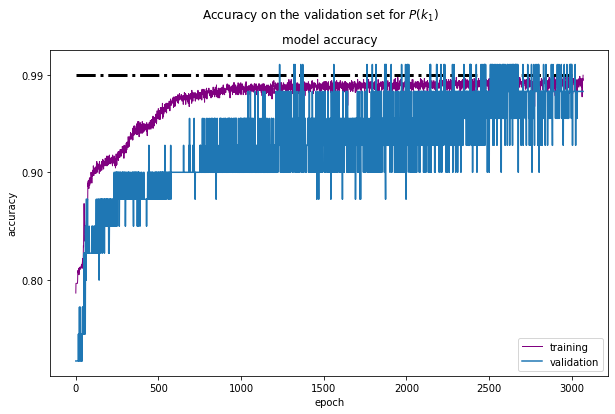

In [27]:


plt.figure(figsize=(10,6))

plt.suptitle(r'Accuracy on the validation set for $P(k_1)$')

#plt.hline()
c = list(np.arange(0,1,0.1))
c.append(0.99)
plt.yticks(c)
plt.plot(history.history['accuracy'],lw=1,color = 'purple')
plt.plot(history.history['val_accuracy'],)
plt.hlines(y = 0.99,xmin=0,xmax=3000,linestyles='dashdot',lw =3)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')



In [28]:
np.save('history',history.history)

<Figure size 432x288 with 0 Axes>

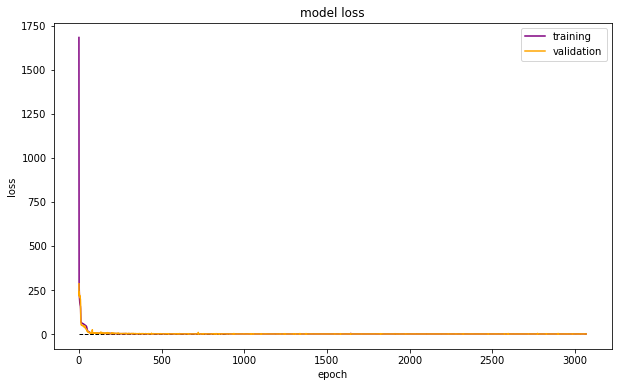

In [29]:
# summarize history for l
plt.suptitle(r'Loss on the validation set for $P(k_1)$')

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color = 'purple')
plt.plot(history.history['val_loss'],color='orange')
plt.hlines(y = 0,xmin=0,xmax=900,linestyles='dashed',lw =1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')

In [30]:
model.save('pk99.h5')

In [31]:
%ls


data_read.py  history.npy  k.txt         nkbins   params   powerspectrum
dT_b          index        neutral_frac  norm_pk  pk99.h5  Untitled.ipynb
